<a href="https://colab.research.google.com/github/EmanueleN-96/img-seg/blob/main/img_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sys
import os
import glob
from google.colab import drive

# Data prep
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns

# Imaging
from PIL import Image

#PyTorch
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

In [ ]:
drive.mount('/content/drive') # Mount drive
os.chdir('/content/drive/My Drive/image_segmentation')
os.getcwd()

Mounted at /content/drive


'/content/drive/My Drive/image_segmentation'

In [ ]:
img_path = 'Kvasir-SEG/images/'
mask_path = 'Kvasir-SEG/masks/'

In [ ]:
print(img_path+'cju0qkwl35piu0993l0dewei2.jpg')

Kvasir-SEG/images/cju0qkwl35piu0993l0dewei2.jpg


Image shape: (529, 622, 3)
Mask shape: (529, 622, 3)


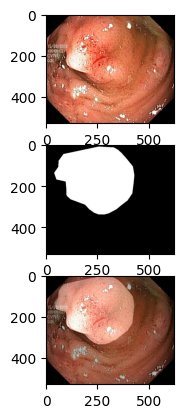

In [ ]:
# Reading the image and mask
image = plt.imread(img_path + 'cju0qkwl35piu0993l0dewei2.jpg')
mask = plt.imread(mask_path + 'cju0qkwl35piu0993l0dewei2.jpg')

# Plotting
fig, axes = plt.subplots(3, 1)

axes[0].imshow(image)
axes[1].imshow(mask)
axes[2].imshow(image, cmap = 'viridis')
axes[2].imshow(mask, alpha = 0.3, cmap = 'viridis')

# Printing the shapes
print(f"Image shape: {image.shape}")
print(f"Mask shape: {mask.shape}")

# Display the plot
plt.show()


In [ ]:
class SegmentationDataset(Dataset):
  def __init__(self, img_dir, mask_dir, transform):
    self.img_dir = img_dir
    self.mask_dir = mask_dir
    self.transform = transform
    self.img_names = os.listdir(img_dir)
    self.mask_names = os.listdir(mask_dir)

    # Sorting
    self.img_names.sort()
    self.mask_names.sort()

  def __len__(self):
    return len(self.img_names)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_names[idx])
    mask_path = os.path.join(self.mask_dir, self.mask_names[idx])

    image = Image.open(img_path).convert("RGB")
    mask = Image.open(mask_path).convert("L")

    if self.transform:
      image = self.transform(image)
      mask = self.transform(mask)

    return image, mask

In [ ]:
# Transform - da modificare
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((256,256))])

# Creation of the dataset
df = SegmentationDataset(img_dir = img_path, mask_dir = mask_path, transform = transform)

# DataLoader
dataloader = DataLoader(df, batch_size = 5, shuffle = True)

# Iterating through the data loader
for image, mask in dataloader:
   print(image.shape)  # Shape of image batch
   print(mask.shape)   # Shape of mask batch
   break  # Only process the first batch for this example

print(len(df.img_names), len(df.mask_names))
print(df.mask_names[:5])
print(df.img_names[:5])

torch.Size([5, 3, 256, 256])
torch.Size([5, 1, 256, 256])
1000 1000
['cju0qkwl35piu0993l0dewei2.jpg', 'cju0qoxqj9q6s0835b43399p4.jpg', 'cju0qx73cjw570799j4n5cjze.jpg', 'cju0roawvklrq0799vmjorwfv.jpg', 'cju0rx1idathl0835detmsp84.jpg']
['cju0qkwl35piu0993l0dewei2.jpg', 'cju0qoxqj9q6s0835b43399p4.jpg', 'cju0qx73cjw570799j4n5cjze.jpg', 'cju0roawvklrq0799vmjorwfv.jpg', 'cju0rx1idathl0835detmsp84.jpg']


In [ ]:
dataloader.image

AttributeError: 'DataLoader' object has no attribute 'image'

In [ ]:
# f= w * y

X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([2,4,6,8], dtype = torch.float32)

w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

# model prediction
def forward(x):
  return w * x

# loss
def loss(y, y_predicted):
  return ((y - y_predicted)**2).mean()

# Gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N + 2*x - ...

def gradient(x, y, y_predicted):
  return np.dot(2*x, y_predicted-y)/x.size

print(f"Prediction before training: f(5) = {forward(5):.3f}")

learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):

  # Prediction
  y_predicted = forward(X)

  # Loss
  l = loss(Y, y_predicted)

  # Gradient
  #dw = gradient(X,Y, y_predicted)
  l.backward() # dl/dw

  # Update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zero grad
  w.grad.zero_()

  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f"Prediction before after training: f(5) = {forward(5):.3f}")


Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 2: w = 0.555, loss = 21.67499924
epoch 3: w = 0.772, loss = 15.66018772
epoch 4: w = 0.956, loss = 11.31448650
epoch 5: w = 1.113, loss = 8.17471695
epoch 6: w = 1.246, loss = 5.90623236
epoch 7: w = 1.359, loss = 4.26725292
epoch 8: w = 1.455, loss = 3.08308983
epoch 9: w = 1.537, loss = 2.22753215
epoch 10: w = 1.606, loss = 1.60939169
epoch 11: w = 1.665, loss = 1.16278565
epoch 12: w = 1.716, loss = 0.84011245
epoch 13: w = 1.758, loss = 0.60698116
epoch 14: w = 1.794, loss = 0.43854395
epoch 15: w = 1.825, loss = 0.31684780
epoch 16: w = 1.851, loss = 0.22892261
epoch 17: w = 1.874, loss = 0.16539653
epoch 18: w = 1.893, loss = 0.11949898
epoch 19: w = 1.909, loss = 0.08633806
epoch 20: w = 1.922, loss = 0.06237914
Prediction before after training: f(5) = 9.612


In [ ]:
# 1) Decide model: input size, output size, forward pass
# 2) Loss and Optimizer
# 3) Training loop:
# - Compute prediction (forward pass)
# - Compute gradients (backward pass)
# - update weights

import torch.nn as nn

# f= w * y

X = torch.tensor([[1], [2], [3], [4]], dtype = torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)

X_test = torch.tensor([5], dtype = torch.float32)

n_samples, n_features = X.shape
input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()

    # Define our layers
    self.lin = nn.Linear(input_dim, output_dim)

    # Define forward
    def forward(self, x):
      return self.lin(x)

#model = nn.Linear(input_size, output_size)

# model prediction

# Gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N + 2*x - ...

print(f"Prediction before training: f(5) = {model(X_test).item():.3f}")

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):

  # Prediction
  y_predicted = model(X)

  # Loss
  l = loss(Y, y_predicted)

  # Gradient
  #dw = gradient(X,Y, y_predicted)
  l.backward() # dl/dw

  # Update weights
  optimizer.step()

  # zero grad
  optimizer.zero_grad()

  if epoch % 1 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f"Prediction before after training: f(5) = {model(X_test).item():.3f}")


Prediction before training: f(5) = -1.372
epoch 1: w = 0.175, loss = 41.10739517
epoch 2: w = 0.467, loss = 28.52603912
epoch 3: w = 0.711, loss = 19.79608917
epoch 4: w = 0.914, loss = 13.73854637
epoch 5: w = 1.083, loss = 9.53533173
epoch 6: w = 1.224, loss = 6.61879349
epoch 7: w = 1.341, loss = 4.59505606
epoch 8: w = 1.439, loss = 3.19081235
epoch 9: w = 1.521, loss = 2.21642256
epoch 10: w = 1.589, loss = 1.54030108
epoch 11: w = 1.645, loss = 1.07114065
epoch 12: w = 1.692, loss = 0.74558473
epoch 13: w = 1.732, loss = 0.51967520
epoch 14: w = 1.765, loss = 0.36290732
epoch 15: w = 1.792, loss = 0.25411576
epoch 16: w = 1.815, loss = 0.17861369
epoch 17: w = 1.834, loss = 0.12621060
epoch 18: w = 1.850, loss = 0.08983553
epoch 19: w = 1.863, loss = 0.06458239
epoch 20: w = 1.874, loss = 0.04704618
epoch 21: w = 1.884, loss = 0.03486490
epoch 22: w = 1.891, loss = 0.02639922
epoch 23: w = 1.898, loss = 0.02051201
epoch 24: w = 1.903, loss = 0.01641376
epoch 25: w = 1.908, loss =